In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [127]:
invoices = pd.read_csv("/Users/shelbygarcia/ITM/fct_invoice.csv")
customers = pd.read_json("/Users/shelbygarcia/ITM/dim_customer.json")

# Easy

1. How many unique customers are in the dataset?

In [30]:
unique_customers = customers['id'].nunique()
print(f'Number of unique customers: {unique_customers}')

Number of unique customers: 5191


2. What are the different categories of products available? How many unique categories are there?

In [33]:
categories = invoices['category'].unique()
unique_categories = invoices['category'].nunique()

print(f'Product categories: {categories}')
print(f'Number of unique categories: {unique_categories}')

Product categories: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
Number of unique categories: 8


3. Which payment method is the most popular? How many times was it used?

In [36]:
popular_payment_method = invoices['payment_method'].value_counts().idxmax()
method_count = invoices['payment_method'].value_counts()[popular_payment_method]
print(f'The most popular payment method is {popular_payment_method}, used {method_count} times.')

The most popular payment method is Cash, used 44447 times.


# Medium

1. What are the three most popular categories, by total sales?

In [212]:
invoices['total_sales'] = invoices['quantity'] * invoices['price']
category_sales = invoices.groupby('category')['total_sales'].sum()
top_categories = category_sales.nlargest(3).reset_index()

print("Top 3 categories by total sales:")
print(top_categories[['category', 'total_sales']])

Top 3 categories by total sales:
     category   total_sales
0    Clothing  1.139968e+08
1       Shoes  6.655345e+07
2  Technology  5.786235e+07


2. What are the total sales attributed to customers over the age of 45?

In [97]:
merge_data = pd.merge(invoices, customers, left_on='customer_id', right_on='id')
customers_over45 = merge_data[merge_data['age']>45]
total_sales_customers_over45 = customers_over45['total_sales'].sum()
print(f'Total sales attributed to customers over the age of 45: {total_sales_customers_over45}')

Total sales attributed to customers over the age of 45: 82039768.15


3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

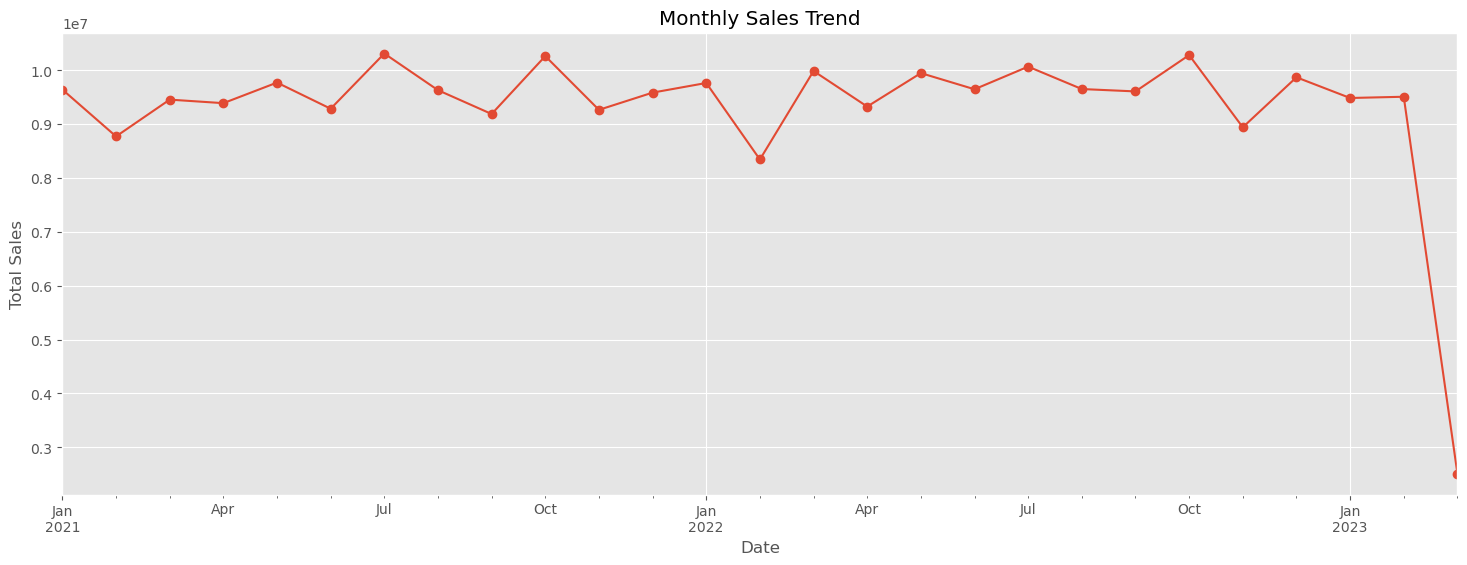

In [163]:

invoices['invoice_date'] = pd.to_datetime(invoices['invoice_date'], dayfirst=True)
invoices['invoice_month'] = invoices['invoice_date'].dt.to_period('M')

sales_by_date = invoices.groupby('invoice_month')['total_sales'].sum()

plt.figure(figsize=(18, 6))
sales_by_date.plot(linestyle='-', marker='o')
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.grid(True)

The "Monthly Sales Trend" line graph indicates that sales increases during January, March, May, July, and October 2021 to 2022. Based on this pattern, the increase in sales can be corroleated to post-holiday and pre-holiday seasons, warmer weather, and back-to-school shoppings. However, there is a significant downfall in sales on the year 2023.  

# Hard

1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [206]:
plt.style.use('ggplot')

merge_data = pd.merge(invoices, customers, left_on='customer_id', right_on='id')

merge_data.dropna(subset=['age'], inplace=True)
merge_data['age_range'] = (merge_data['age'] // 10 * 10).astype(str) + '-' + ((merge_data['age'] // 10 * 10) + 9).astype(str)
merge_data['age_range'] = merge_data['age_range'].str.replace('.0', '')

pivot_table = merge_data.pivot_table(values='total_sales', index='category', columns='age_range', aggfunc='sum')
print(pivot_table)
merge_data.drop(['category', 'age', 'customer_id'], inplace=True, axis=1)

age_range             10-19        20-29        30-39        40-49  \
category                                                             
Books              12801.75     79461.75     84143.10     87203.40   
Clothing         1927413.84  10250732.80  11354126.96  11215189.92   
Cosmetics         109619.36    605915.32    723544.70    665034.96   
Food & Beverage    13582.31     73491.96     87246.86     89553.29   
Shoes             993281.35   5924878.24   7200839.66   7025590.02   
Souvenir           12375.15     54943.32     64092.72     66391.80   
Technology       1129800.00   5261550.00   6159300.00   5954550.00   
Toys               60426.24    385100.80    420582.40    390906.88   

age_range              50-59        60-69       70-79       80-89  
category                                                           
Books               74962.20     80476.80    54827.85    26664.00  
Clothing         10321851.76  10660642.08  7769371.28  4493698.00  
Cosmetics          587780.9